![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **MONTECARLO SIMULATION - HESTON PROCESS**

## **¿How can you build a montercarlo simulation for Heston Process?**

<font size="3"> In this notebook we are showing how you can run a montecarlo simulation for a Heston Process in python. Montecarlo simulation is a powerful technique that allows you visualize different paths a financial asset could take in the future. You can also use this technique for derivatives pricing.  The Heston Process belongs to the category of square root diffusion process, similar to the COX model for interest rates. If you would like to know more about the COX model please look <a href="https://quant-trading.co/montecarlo-simulation-for-cox-ingersoll-ross-cir-process/" target="_blank">here</a>.<br><br>
    
<font size="3"> Please remember that we showed how to simulate Geometric Brownian Motion in this  <a href="https://quant-trading.co/montercarlo-simulation-geometric-brownian-motion/" target="_blank">notebook</a>. In that case, we can get an exact simulation of the process. However, here in the Heston process we can only get a second order approximation. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from numpy.random import rand
import scipy.stats
import matplotlib.pyplot as plt

## **Define all the required parameters**

<font size="3"> We need to define some parameters such as: a) The number of simulations that we are going to run, b) The number of steps to use in each path the asset will follow, c) The spot price of our financial asset, d) The time step in the simulation, e) The risk-free interest rate, f) The volatility of the volatility our financial asset, g) The correlation between the financial asset and the volatility, h) The mean reversion constant for the volatility process, i) The long run variance, j) The long run variance. <br><br>

In [2]:
M = 100               #Number of paths
d = 250                #Number of steps

spot = 100          #Spot
T=1                    #Time to maturity
delta_t = T/d
r = 0.05            #Interest rate
sigma = 0.30         #Volatility of volatility
rho = -0.75          #Correlation spot-vol
sigma1 = rho*sigma   #Relationship to generate two independent brownian motions
sigma2 = np.sqrt(sigma**2-sigma1**2)
kappa = 0.5          #Mean reversion constant for vol process
theta = 0.0725        #Long run variance
variance = 0.026     #Initial variance

## **Initialize the inverse normal function and normal function**

<font size="3"> We need to transform uniform random variables into normal random variables. We can do that using the inverse normal function.<br><br>

In [3]:
norminv = scipy.stats.distributions.norm.ppf         
norm = scipy.stats.distributions.norm.cdf

## **Generate uniformly distributed and normal random variables**

<font size="3"> We can use the rand function to generate uniformly and normal distributed random variables as following <br><br>

In [4]:
y1 = rand(M,d)
y2 = rand(M,d)
y3 = rand(M,d)
z1 = norminv(y1)
z2 = norminv(y2)

## **Create a vector with the initial spot price and the initial variance**

<font size="3"> We need to create a column vector that contains the spot price and another with the initial variance. The number of rows will be equal to the number of simulations that we are going to run<br><br>

In [5]:
initial_spot_asset=spot*np.ones((M,1))
initial_variance_asset=variance*np.ones((M,1))

## **Create a matrix**

<font size="3"> We need to store the results from our montecarlo simulation, so we create two matrices with M rows and d columns. Then we append the previously created spot vectors to them<br><br>

In [6]:
ASSET = np.zeros((M,d))
ASSET = np.append(initial_spot_asset,ASSET,axis=1) 

ASSET_VARIANCE = np.zeros((M,d))
ASSET_VARIANCE = np.append(initial_variance_asset,ASSET_VARIANCE,axis=1) 

## **Generate the simulation paths**

<font size="3"> Using the discretized equation of the heston process and the matrices of uniform and normal random variables we can create the paths for our simulation as follows.<br><br> Please note that we are taking the absolute value of the variance to avoid taking the square root of a negative number or dividing by zero. 

In [7]:
for i in range(0,M):
    for j in range(0,d):
        if y3[i,j] > 0.5:
            epsilon = delta_t            
        else: 
             epsilon = -delta_t             
        
        
        ASSET[i,j+1] = ASSET[i,j]*(1+r*delta_t + np.sqrt(abs(ASSET_VARIANCE[i,j]))*np.sqrt(delta_t)*z1[i,j]) \
                        +0.5*r**2*ASSET[i,j]*delta_t**2   \
                        +((r+0.25*(sigma1-kappa)*ASSET[i,j]*np.sqrt(abs(ASSET_VARIANCE[i,j])))+ (0.25*(kappa-theta) - 0.0625*sigma**2 )*(ASSET[i,j]/np.sqrt(abs(ASSET_VARIANCE[i,j])))  ) * np.sqrt(delta_t) * z1[i,j] * delta_t       \
                        +0.5*ASSET[i,j]*(ASSET_VARIANCE[i,j]+0.5*sigma1)*(delta_t*z1[i,j]**2-delta_t) + 0.25*sigma2*ASSET[i,j]*(np.sqrt(delta_t)*z2[i,j]*np.sqrt(delta_t)*z1[i,j]+epsilon)  
        
        ASSET_VARIANCE[i,j+1] = kappa*theta*delta_t + (1 - kappa*delta_t)*abs(ASSET_VARIANCE[i,j]) \
                                + np.sqrt(abs(ASSET_VARIANCE[i,j])) * (sigma1*np.sqrt(delta_t)*z1[i,j] + sigma2*np.sqrt(delta_t)*z2[i,j]) - 0.5*kappa**2*(theta - abs(ASSET_VARIANCE[i,j]) ) * delta_t**2    \
                                + ( (0.25*kappa*theta -0.0625*sigma**2)/np.sqrt(abs(ASSET_VARIANCE[i,j]))  - 1.5*kappa* np.sqrt(abs(ASSET_VARIANCE[i,j])) ) * (sigma1*np.sqrt(delta_t)*z1[i,j] + sigma2*np.sqrt(delta_t)*z2[i,j]  )*delta_t   \
                                +0.25*sigma1**2*(delta_t*z1[i,j]**2-delta_t) + 0.25* sigma2**2*(delta_t*z2[i,j]**2-delta_t) + 0.5*sigma1*sigma2*np.sqrt(delta_t)*z1[i,j]*z2[i,j]


## **Plot the results**

<font size="3"> We can plot the results as follows<br><br>

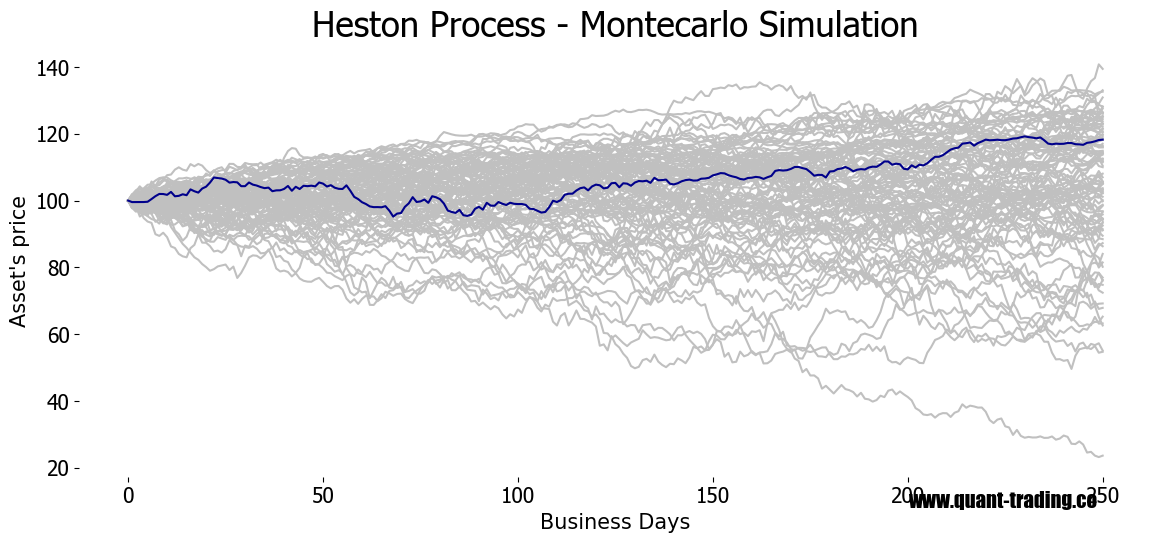

In [8]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.plot(ASSET[0:100,:].transpose(),c='silver')
ax.plot(ASSET[0:1,:].transpose(),c='darkblue')
ax.set_facecolor('white') 

plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
plt.ylabel("Asset's price",fontsize=15)
plt.xlabel("Business Days",fontsize=15)

plt.title("Heston Process - Montecarlo Simulation", size=25, family='Tahoma')
plt.box(on=None)


plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)
plt.text(200, np.min(ASSET[0:100,:])-15,'www.quant-trading.co' , color='black', fontsize=15,family='Impact')
plt.show()

<font size="3"> If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)